In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

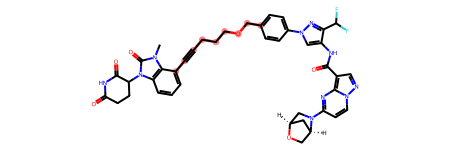

In [26]:
mol = Chem.MolFromSmiles('C12=C(C(=O)NC3=CN(C4=CC=C(COCCCC#CC5=C6C(=CC=C5)N(C5C(=O)NC(=O)CC5)C(=O)N6C)C=C4)N=C3C(F)F)C=NN1C=CC(N1C[C@@H]3OC[C@H]1C3)=N2')
substructure = Chem.MolFromSmarts('[*:1]C#CCCCOC[*:2]')
mol.GetSubstructMatches(substructure)
mol

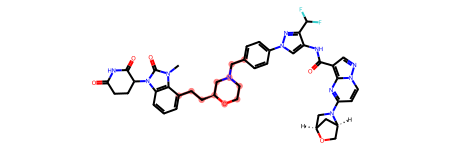

In [27]:
mol = Chem.MolFromSmiles('C12=C(C(=O)NC3=CN(C4=CC=C(CN5C[C@H](CCC6=C7C(=CC=C6)N(C6C(=O)NC(=O)CC6)C(=O)N7C)OCC5)C=C4)N=C3C(F)F)C=NN1C=CC(N1C[C@@H]3OC[C@H]1C3)=N2')
substructure = Chem.MolFromSmarts('[*:1]CC[C@H]1CN(C[*:2])CCO1')
mol.GetSubstructMatches(substructure)
mol

In [38]:
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D
import io
from PIL import Image

def Highlight_substructures(SMILES_mol, SMART_query, color=(0.0, 0.0, 1.0, 0.3)):
    mol = Chem.MolFromSmiles(SMILES_mol)
    substructure = Chem.MolFromSmarts(SMART_query)
    matches = mol.GetSubstructMatches(substructure)

    atoms = []
    for a in mol.GetAtoms():
        atoms.append(a.GetIdx())

    bonds = []
    for bond in mol.GetBonds():
        aid1 = atoms[bond.GetBeginAtomIdx()]
        aid2 = atoms[bond.GetEndAtomIdx()]
        bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

    drawer = rdMolDraw2D.MolDraw2DCairo(500,300)
    drawer.drawOptions().fillHighlights=True
    drawer.drawOptions().setHighlightColour((rgba_color))
    drawer.drawOptions().highlightBondWidthMultiplier=20
    drawer.drawOptions().clearBackground = True    #False
    drawer.DrawMolecule(mol, highlightAtoms=[atom for match in matches for atom in match])
    # rdMolDraw2D.PrepareAndDrawMolecule(drawer, mol, highlightAtoms=atoms, highlightBonds=bonds)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    # bio = io.BytesIO(drawer.GetDrawingText())
    # output = Image.open(bio)
    return svg

In [39]:

SMILES_mol = 'C12=C(C(=O)NC3=CN(C4=CC=C(CN5C[C@H](CCC6=C7C(=CC=C6)N(C6C(=O)NC(=O)CC6)C(=O)N7C)OCC5)C=C4)N=C3C(F)F)C=NN1C=CC(N1C[C@@H]3OC[C@H]1C3)=N2'
SMART_query = '[*:1]CC[C@H]1CN(C[*:2])CCO1'
rgba_color = (0.0, 0.0, 1.0, 0.3) # transparent blue

Image = Highlight_substructures(SMILES_mol, SMART_query, color=rgba_color)
Image

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf4\x00\x00\x01,\x08\x02\x00\x00\x00\xba\xd9\xd6\x9f\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddwX\x93\xc7\x03\x07\xf0o\x06{( \x08\xc8t`AEQTT\x9c\xc5Y\x1cu/\x1c?\x15\xf7\xa8\xad\x8a\x13GkQ\xab\xe2\xa8\x16\xb4V\x01\xb7\xd6V\xeb\x1e8p2D\x10Q\x11Q\x08{\xcf\x102\xee\xf7\xc7\x1b\x01\x11\'o\xc2\xf0>\x8fO\x1e\x92\xbc\xdc]@\xbe\xb9\xdc{\xef\x1d\x87\x10\x02\x8a\xa2(\xaan\xe1Vw\x03(\x8a\xa2(\xf6\xd1p\xa7(\x8a\xaa\x83h\xb8S\x14E\xd5A4\xdc)\x8a\xa2\xea \x1a\xee\x14EQu\x10\rw\x8a\xa2\xa8:\x88\x86;EQT\x1dD\xc3\x9d\xa2(\xaa\x0e\xa2\xe1NQ\x14U\x07\xd1p\xa7(\x8a\xaa\x83h\xb8S\x14E\xd5A4\xdc)\x8a\xa2\xea \x1a\xee\x14EQu\x10\rw\x8a\xa2\xa8:\x88\x86;EQT\x1dD\xc3\x9d\xa2(\xaa\x0e\xa2\xe1NQ\x14U\x07\xd1p\xa7(\x8a\xaa\x83h\xb8S\x14E\xd5A4\xdc)\x8a\xa2\xea \x1a\xee\x14EQu\x10\rw\x8a\xa2\xa8:\x88\x86;EQT\x1dD\xc3\x9d\xa2(\xaa\x0e\xa2\xe1NQ\x14U\x07\xd1p\xa7(\x8a\xaa\x83h\xb8S\x14E\xd5A4\xdc)\x8a\xa2\xea \x1a\xee\x14

In [40]:
mol = Chem.MolFromSmiles('C12=C(C(=O)NC3=CN(C4=CC=C(CN5C[C@H](CCC6=C7C(=CC=C6)N(C6C(=O)NC(=O)CC6)C(=O)N7C)OCC5)C=C4)N=C3C(F)F)C=NN1C=CC(N1C[C@@H]3OC[C@H]1C3)=N2')
substructure = Chem.MolFromSmarts('[*:1]CC[C@H]1CN(C[*:2])CCO1')
rgba_color = (0.0, 0.0, 1.0, 0.3) # transparent blue

Image = Highlight_substructures(SMILES_mol, SMART_query, color=rgba_color)
Image

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf4\x00\x00\x01,\x08\x02\x00\x00\x00\xba\xd9\xd6\x9f\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddwX\x93\xc7\x03\x07\xf0o\x06{( \x08\xc8t`AEQTT\x9c\xc5Y\x1cu/\x1c?\x15\xf7\xa8\xad\x8a\x13GkQ\xab\xe2\xa8\x16\xb4V\x01\xb7\xd6V\xeb\x1e8p2D\x10Q\x11Q\x08{\xcf\x102\xee\xf7\xc7\x1b\x01\x11\'o\xc2\xf0>\x8fO\x1e\x92\xbc\xdc]@\xbe\xb9\xdc{\xef\x1d\x87\x10\x02\x8a\xa2(\xaan\xe1Vw\x03(\x8a\xa2(\xf6\xd1p\xa7(\x8a\xaa\x83h\xb8S\x14E\xd5A4\xdc)\x8a\xa2\xea \x1a\xee\x14EQu\x10\rw\x8a\xa2\xa8:\x88\x86;EQT\x1dD\xc3\x9d\xa2(\xaa\x0e\xa2\xe1NQ\x14U\x07\xd1p\xa7(\x8a\xaa\x83h\xb8S\x14E\xd5A4\xdc)\x8a\xa2\xea \x1a\xee\x14EQu\x10\rw\x8a\xa2\xa8:\x88\x86;EQT\x1dD\xc3\x9d\xa2(\xaa\x0e\xa2\xe1NQ\x14U\x07\xd1p\xa7(\x8a\xaa\x83h\xb8S\x14E\xd5A4\xdc)\x8a\xa2\xea \x1a\xee\x14EQu\x10\rw\x8a\xa2\xa8:\x88\x86;EQT\x1dD\xc3\x9d\xa2(\xaa\x0e\xa2\xe1NQ\x14U\x07\xd1p\xa7(\x8a\xaa\x83h\xb8S\x14E\xd5A4\xdc)\x8a\xa2\xea \x1a\xee\x14